In [1]:
import os
os.chdir(os.path.join(os.getcwd(), '..'))
os.getcwd()

'/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA'

In [2]:
from src.utils import get_dataset
from src.utils import select_data

import av
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.convolutional import Convolution3D
from keras.layers.convolutional import MaxPooling3D
from keras.layers.convolutional import ZeroPadding3D

from keras.optimizers import Adam

/home/renjie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
DATA_PATH = os.path.join(os.getcwd(), 'data')
os.listdir(DATA_PATH)

['Depth', 'Inertial', 'Skeleton', 'RGB']

In [4]:
depth_path, inertial_path, skeleton_path, rgb_path = get_dataset(DATA_PATH)

In [5]:
activities = list(range(1,28))

In [ ]:
# rgb_path

In [7]:
vid = av.open(rgb_path[450])

In [8]:
images = []
for packet in vid.demux():
    for frame in packet.decode():
        img = frame.to_image()  # PIL/Pillow image
        arr = np.asarray(img)  # numpy array
        images.append(arr)

deprecated pixel format used, make sure you did set range correctly


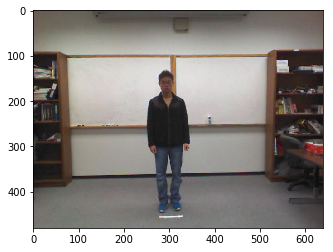

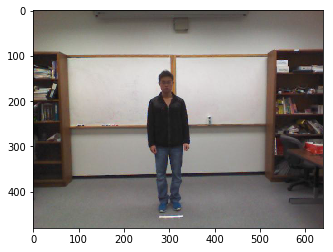

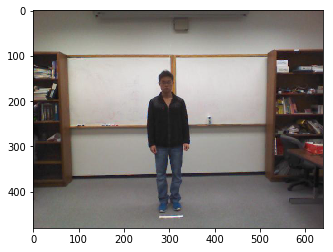

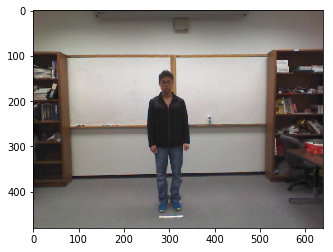

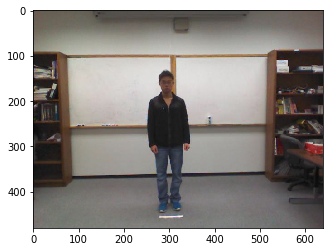

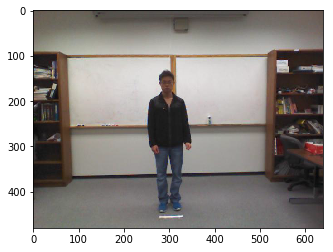

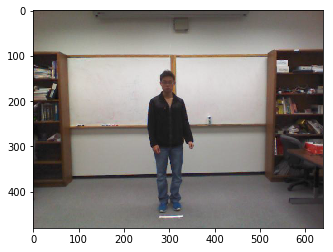

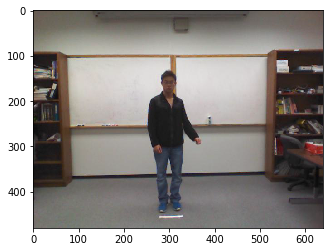

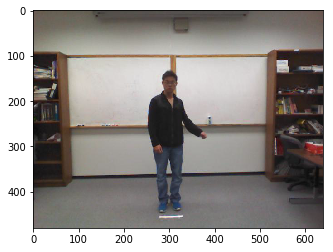

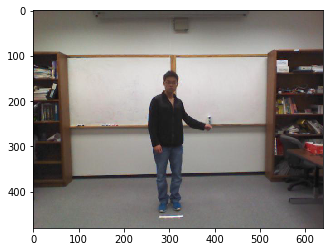

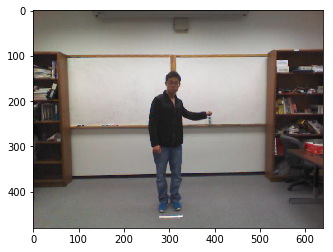

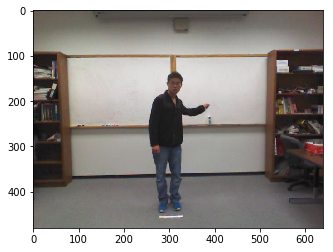

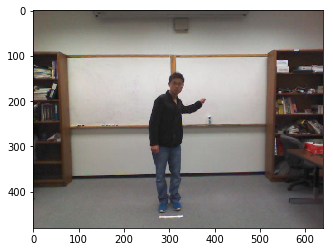

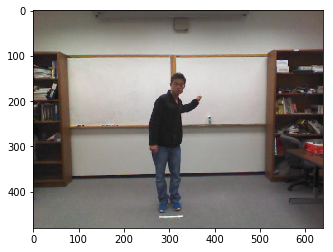

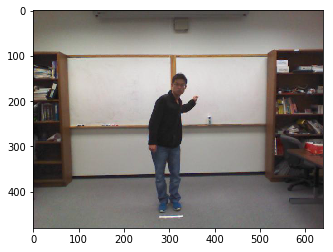

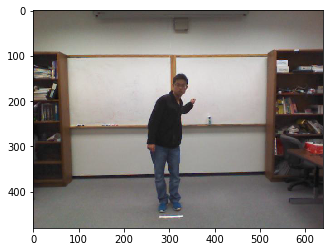

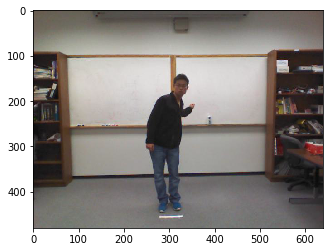

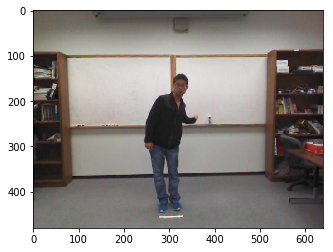

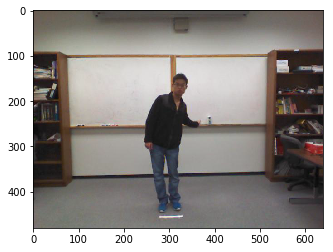

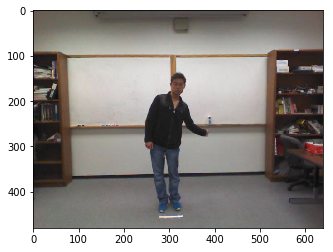

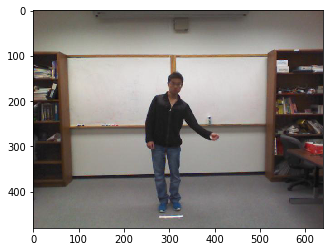

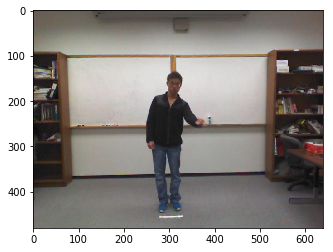

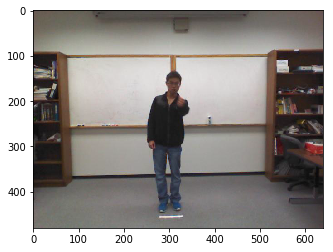

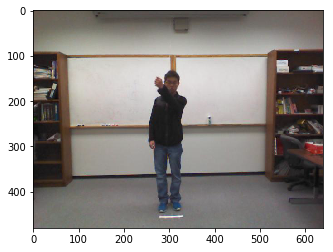

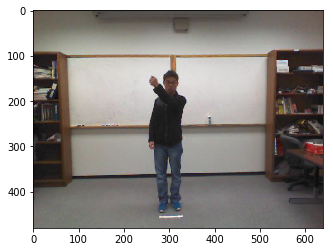

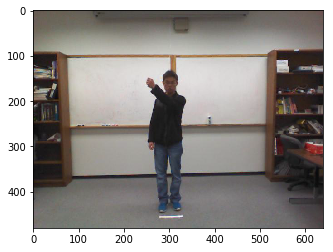

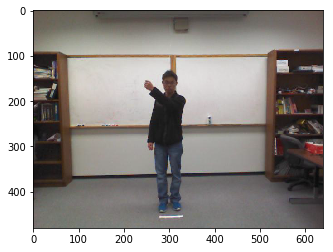

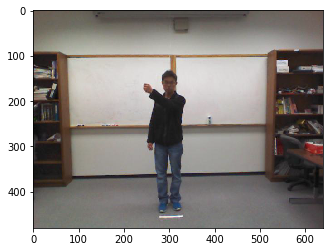

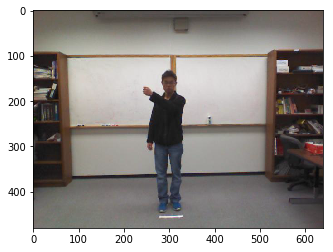

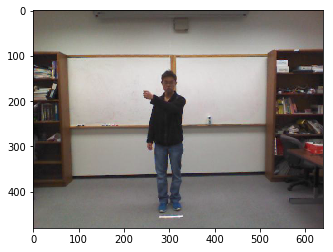

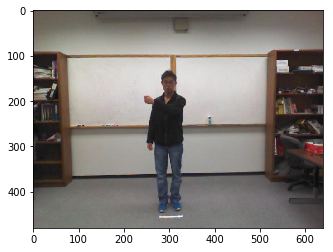

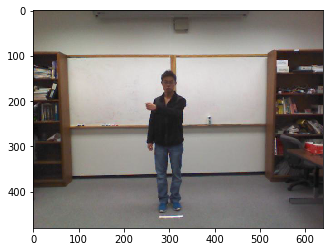

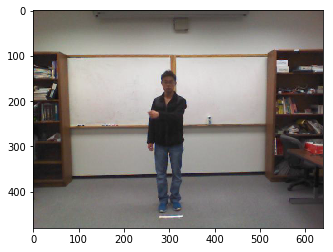

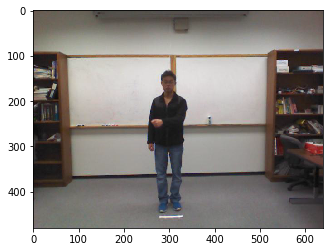

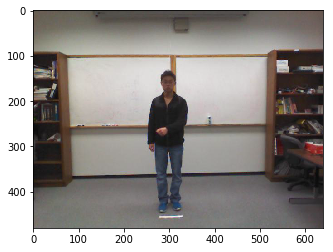

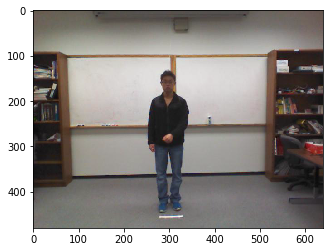

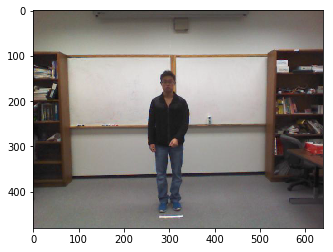

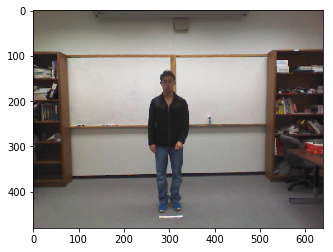

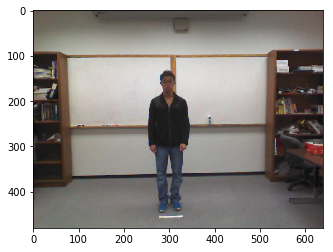

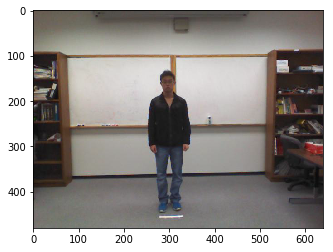

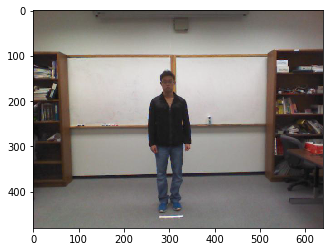

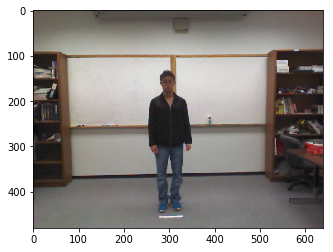

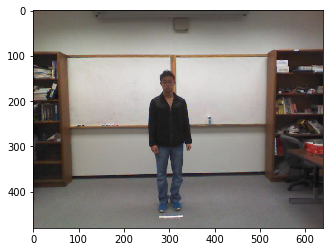

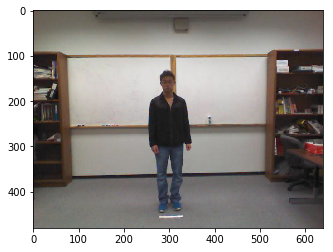

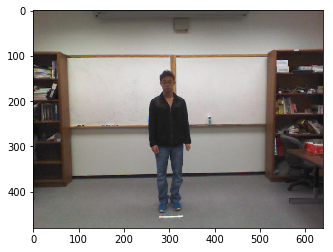

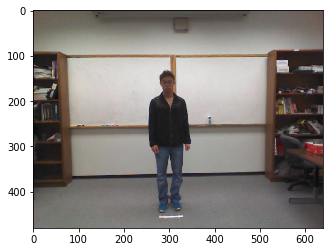

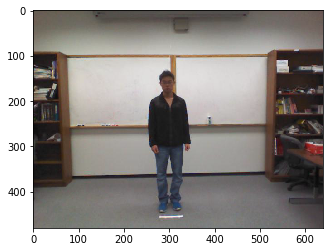

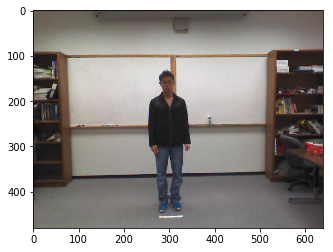

In [9]:
for i in np.array(images):
    plt.imshow(i)
    plt.show()

# Model

In [ ]:
model = Sequential()
# 1st layer group
model.add(Convolution3D(64, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv1',
                        subsample=(1, 1, 1), 
                        input_shape=(3, 16, 112, 112)))
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), 
                       border_mode='valid', name='pool1'))
# 2nd layer group
model.add(Convolution3D(128, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv2',
                        subsample=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                       border_mode='valid', name='pool2'))
# 3rd layer group
model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv3a',
                        subsample=(1, 1, 1)))
model.add(Convolution3D(256, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv3b',
                        subsample=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                       border_mode='valid', name='pool3'))
# 4th layer group
model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv4a',
                        subsample=(1, 1, 1)))
model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv4b',
                        subsample=(1, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                       border_mode='valid', name='pool4'))
# 5th layer group
model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv5a',
                        subsample=(1, 1, 1)))
model.add(Convolution3D(512, 3, 3, 3, activation='relu', 
                        border_mode='same', name='conv5b',
                        subsample=(1, 1, 1)))
model.add(ZeroPadding3D(padding=(0, 1, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                       border_mode='valid', name='pool5'))
model.add(Flatten())
# FC layers group
model.add(Dense(4096, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(4096, activation='relu', name='fc7'))
model.add(Dropout(.5))
model.add(Dense(487, activation='softmax', name='fc8'))

print(model.summary())